In [16]:
import pandas as pd

# Baca file Excel
file_path = "./Dataset/fixed_formatData.xlsx"
df = pd.read_excel(file_path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [17]:
# Hitung rata-rata R, G, dan B berdasarkan kombinasi Perlakuan dan Pengambilan
mean_rgb = df.groupby(['Perlakuan', 'Pengambilan'])[['R', 'G', 'B']].mean().reset_index()

# Tampilkan hasil
print("Rata-rata R, G, dan B per Perlakuan dan Pengambilan:")
print(mean_rgb)

Rata-rata R, G, dan B per Perlakuan dan Pengambilan:
    Perlakuan  Pengambilan           R           G           B
0           0            1  148.693333  150.792000  117.351200
1           0            2  143.643564  147.645545  111.587129
2           0            3  143.641026  146.476923  109.260000
3           0            4  130.722222  136.500000   92.551389
4           1            1  151.890244  152.248780  114.314146
5           1            2  146.933333  150.376000  116.044267
6           1            3  145.550562  148.325843  114.868989
7           1            4  153.057377  154.822951  122.856721
8           2            1  152.852941  154.929412  123.797059
9           2            2  150.090909  153.772727  124.913182
10          2            3  147.514019  150.256075  117.487664
11          2            4  145.483871  149.464516  115.595054
12          3            1  128.541667  131.066667   85.134167
13          3            2  159.226804  159.936082  121.313814
14

In [18]:
# Hitung Nilai Excess Green
mean_rgb['Excess_Green'] = (2 * mean_rgb['G']) - (mean_rgb['R'] + mean_rgb['B'])

# Menampilkan Hasil Nilai Excess Green
excess_green = mean_rgb[['Perlakuan', 'Pengambilan', 'Excess_Green']]
print(excess_green)

    Perlakuan  Pengambilan  Excess_Green
0           0            1     35.539467
1           0            2     40.060396
2           0            3     40.052821
3           0            4     49.726389
4           1            1     38.293171
5           1            2     37.774400
6           1            3     36.232135
7           1            4     33.731803
8           2            1     33.208824
9           2            2     32.541364
10          2            3     35.510467
11          2            4     37.850108
12          3            1     48.457500
13          3            2     39.331546
14          3            3     46.723778
15          3            4     31.713265


In [19]:
# Data nilai absorbansi per perlakuan
data = {
    'Perlakuan': [0, 1, 2, 3],
    'A665': [0.6247, 0.6780, 0.6781, 0.6888],
    'A645': [0.6494, 0.6959, 0.6960, 0.7056],
    'A669': [0.6179, 0.6719, 0.6720, 0.6822],
}

# Buat DataFrame
df_chlor = pd.DataFrame(data)
df_chlor

,Perlakuan,A665,A645,A669
0,0,0.6247,0.6494,0.6179
1,1,0.6780,0.6959,0.6719
2,2,0.6781,0.6960,0.6720
3,3,0.6888,0.7056,0.6822


In [20]:
# Hitung Klorofil A dan B
df_chlor['Klorofil_A'] = 12.7 * df_chlor['A665'] - 2.69 * df_chlor['A645']
df_chlor['Klorofil_B'] = 22.9 * df_chlor['A645'] - 4.68 * df_chlor['A669']
df_chlor['Total_Klorofil'] = 20.2 * df_chlor['A645'] + 8.02 * df_chlor['A665']

# Tampilkan hasil
print(df_chlor[['Perlakuan', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']])

   Perlakuan  Klorofil_A  Klorofil_B  Total_Klorofil
0          0    6.186804   11.979488       18.127974
1          1    6.738629   12.791618       19.494740
2          2    6.739630   12.793440       19.497562
3          3    6.849696   12.965544       19.777296


In [21]:
combined = pd.merge(excess_green, df_chlor[['Perlakuan', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']], on='Perlakuan')

print("Data Gabungan:")
print(combined)

Data Gabungan:
    Perlakuan  Pengambilan  Excess_Green  Klorofil_A  Klorofil_B  \
0           0            1     35.539467    6.186804   11.979488   
1           0            2     40.060396    6.186804   11.979488   
2           0            3     40.052821    6.186804   11.979488   
3           0            4     49.726389    6.186804   11.979488   
4           1            1     38.293171    6.738629   12.791618   
5           1            2     37.774400    6.738629   12.791618   
6           1            3     36.232135    6.738629   12.791618   
7           1            4     33.731803    6.738629   12.791618   
8           2            1     33.208824    6.739630   12.793440   
9           2            2     32.541364    6.739630   12.793440   
10          2            3     35.510467    6.739630   12.793440   
11          2            4     37.850108    6.739630   12.793440   
12          3            1     48.457500    6.849696   12.965544   
13          3            2     39

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

X = combined[['Excess_Green']]

# Fungsi mencari model KNN terbaik
def knn_gridsearch(X, y, label):
    param_grid = {'n_neighbors': list(range(1, 11))}
    knn = KNeighborsRegressor()
    grid = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid.fit(X, y)
    
    print(f"\n{label} - Best k: {grid.best_params_['n_neighbors']}")
    return grid.best_estimator_

# Model dan evaluasi untuk Klorofil A
y_A = combined['Klorofil_A']
model_A = knn_gridsearch(X, y_A, 'Klorofil A')
combined['Prediksi_Klorofil_A'] = model_A.predict(X)

# Model dan evaluasi untuk Klorofil B 
y_B = combined['Klorofil_B']
model_B = knn_gridsearch(X, y_B, 'Klorofil B')
combined['Prediksi_Klorofil_B'] = model_B.predict(X)

# Model dan evaluasi untuk Total Klorofil
y_total = combined['Total_Klorofil']
model_total = knn_gridsearch(X, y_total, 'Total Klorofil')
combined['Prediksi_Total_Klorofil'] = model_total.predict(X)



Klorofil A - Best k: 5

Klorofil B - Best k: 5

Total Klorofil - Best k: 5


In [23]:
# Tampilkan Hasil Prediksi KNN Klorofil A
print("\n=== Hasil Prediksi KNN (Klorofil A) ===")
print(combined[['Perlakuan', 'Pengambilan', 'Excess_Green', 'Klorofil_A', 'Prediksi_Klorofil_A']])


=== Hasil Prediksi KNN (Klorofil A) ===
    Perlakuan  Pengambilan  Excess_Green  Klorofil_A  Prediksi_Klorofil_A
0           0            1     35.539467    6.186804             6.628464
1           0            2     40.060396    6.186804             6.540313
2           0            3     40.052821    6.186804             6.540313
3           0            4     49.726389    6.186804             6.451961
4           1            1     38.293171    6.738629             6.650678
5           1            2     37.774400    6.738629             6.761043
6           1            3     36.232135    6.738629             6.628664
7           1            4     33.731803    6.738629             6.628865
8           2            1     33.208824    6.739630             6.761443
9           2            2     32.541364    6.739630             6.761443
10          2            3     35.510467    6.739630             6.628464
11          2            4     37.850108    6.739630             6.7610

In [24]:
# Tampilkan Hasil Prediksi KNN Klorofil B
print("\n=== Hasil Prediksi KNN (Klorofil B) ===")
print(combined[['Perlakuan', 'Pengambilan', 'Excess_Green', 'Klorofil_B', 'Prediksi_Klorofil_B']])


=== Hasil Prediksi KNN (Klorofil B) ===
    Perlakuan  Pengambilan  Excess_Green  Klorofil_B  Prediksi_Klorofil_B
0           0            1     35.539467   11.979488            12.629556
1           0            2     40.060396   11.979488            12.501916
2           0            3     40.052821   11.979488            12.501916
3           0            4     49.726389   11.979488            12.373910
4           1            1     38.293171   12.791618            12.664342
5           1            2     37.774400   12.791618            12.826768
6           1            3     36.232135   12.791618            12.629921
7           1            4     33.731803   12.791618            12.630285
8           2            1     33.208824   12.793440            12.827496
9           2            2     32.541364   12.793440            12.827496
10          2            3     35.510467   12.793440            12.629556
11          2            4     37.850108   12.793440            12.8267

In [25]:
# Tampilkan Hasil Prediksi KNN Total Klorofil
print("\n=== Hasil Prediksi KNN (Total Klorofil) ===")
print(combined[['Perlakuan', 'Pengambilan', 'Excess_Green', 'Total_Klorofil', 'Prediksi_Total_Klorofil']])


=== Hasil Prediksi KNN (Total Klorofil) ===
    Perlakuan  Pengambilan  Excess_Green  Total_Klorofil  \
0           0            1     35.539467       18.127974   
1           0            2     40.060396       18.127974   
2           0            3     40.052821       18.127974   
3           0            4     49.726389       18.127974   
4           1            1     38.293171       19.494740   
5           1            2     37.774400       19.494740   
6           1            3     36.232135       19.494740   
7           1            4     33.731803       19.494740   
8           2            1     33.208824       19.497562   
9           2            2     32.541364       19.497562   
10          2            3     35.510467       19.497562   
11          2            4     37.850108       19.497562   
12          3            1     48.457500       19.777296   
13          3            2     39.331546       19.777296   
14          3            3     46.723778       19.77729

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fungsi evaluasi
def evaluasi_model(y_true, y_pred, nama_target):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== Evaluasi Model KNN untuk {nama_target} ===")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"R²   : {r2:.4f}")

# Evaluasi masing-masing target
evaluasi_model(combined['Klorofil_A'], combined['Prediksi_Klorofil_A'], 'Klorofil A')
evaluasi_model(combined['Klorofil_B'], combined['Prediksi_Klorofil_B'], 'Klorofil B')
evaluasi_model(combined['Total_Klorofil'], combined['Prediksi_Total_Klorofil'], 'Total Klorofil')


=== Evaluasi Model KNN untuk Klorofil A ===
MAE  : 0.1946
MSE  : 0.0613
MAPE : 2.99%
R²   : 0.0863

=== Evaluasi Model KNN untuk Klorofil B ===
MAE  : 0.2891
MSE  : 0.1349
MAPE : 2.32%
R²   : 0.0834

=== Evaluasi Model KNN untuk Total Klorofil ===
MAE  : 0.4838
MSE  : 0.3787
MAPE : 2.55%
R²   : 0.0851


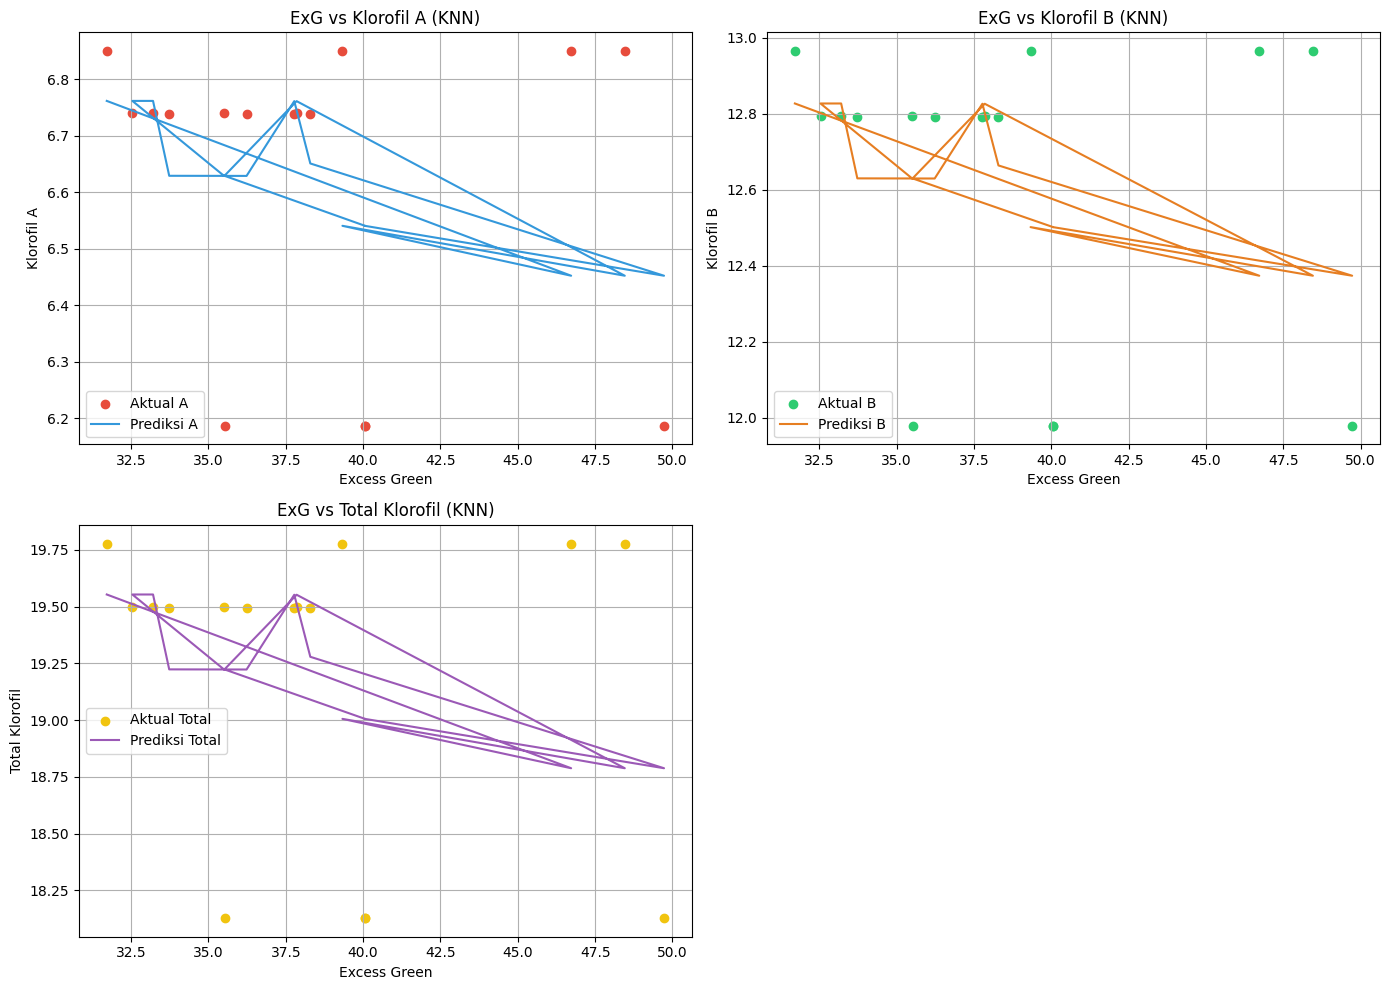

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2)

# Subplot Klorofil A
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(combined['Excess_Green'], combined['Klorofil_A'], color='#e74c3c', label='Aktual A')
ax1.plot(combined['Excess_Green'], combined['Prediksi_Klorofil_A'], color='#3498db', label='Prediksi A')
ax1.set_title('ExG vs Klorofil A (KNN)')
ax1.set_xlabel('Excess Green')
ax1.set_ylabel('Klorofil A')
ax1.legend()
ax1.grid(True)

# Subplot Klorofil B
ax2 = plt.subplot(gs[0, 1])
ax2.scatter(combined['Excess_Green'], combined['Klorofil_B'], color='#2ecc71', label='Aktual B')
ax2.plot(combined['Excess_Green'], combined['Prediksi_Klorofil_B'], color='#e67e22', label='Prediksi B')
ax2.set_title('ExG vs Klorofil B (KNN)')
ax2.set_xlabel('Excess Green')
ax2.set_ylabel('Klorofil B')
ax2.legend()
ax2.grid(True)

# Subplot Total Klorofil
ax3 = plt.subplot(gs[1, 0])
ax3.scatter(combined['Excess_Green'], combined['Total_Klorofil'], color='#f1c40f', label='Aktual Total')
ax3.plot(combined['Excess_Green'], combined['Prediksi_Total_Klorofil'], color='#9b59b6', label='Prediksi Total')
ax3.set_title('ExG vs Total Klorofil (KNN)')
ax3.set_xlabel('Excess Green')
ax3.set_ylabel('Total Klorofil')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

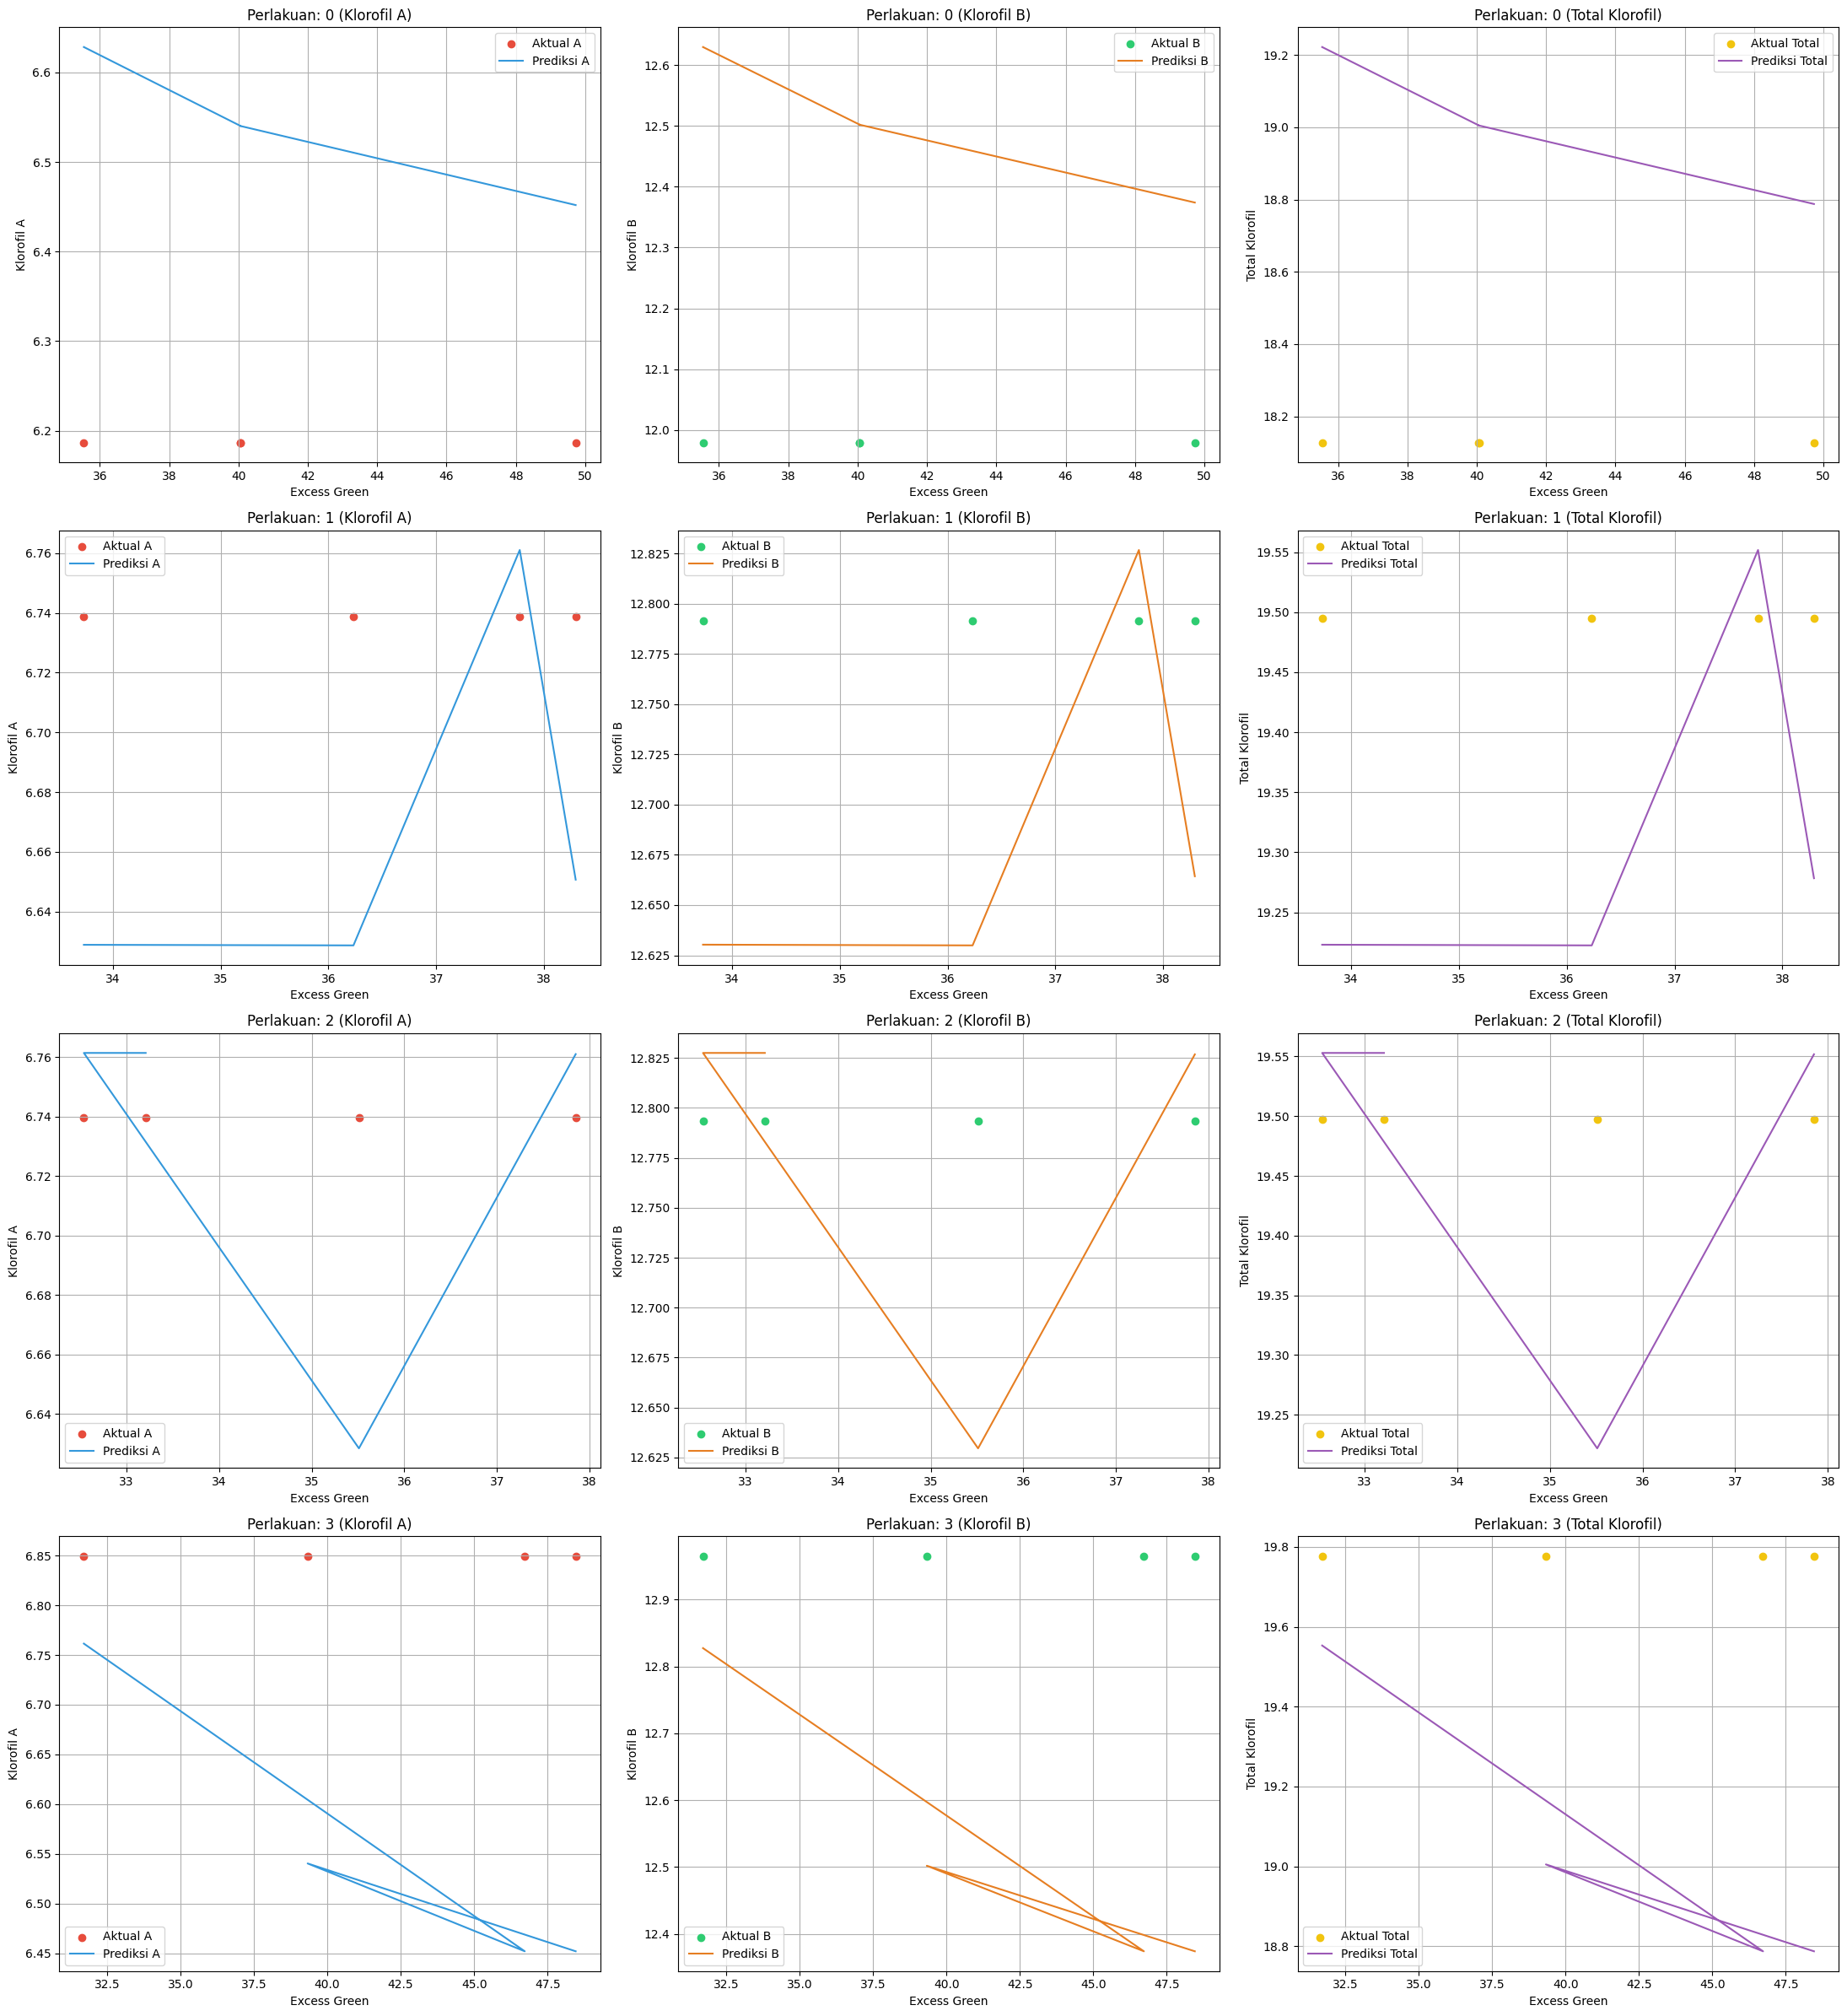

In [28]:
perlakuan_list = combined['Perlakuan'].unique()

# Buat plot
fig, axs = plt.subplots(len(perlakuan_list), 3, figsize=(22, 6 * len(perlakuan_list)))

for i, perlakuan in enumerate(perlakuan_list):
    subset = combined[combined['Perlakuan'] == perlakuan]
    
    # Subplot Klorofil A
    axs[i, 0].scatter(subset['Excess_Green'], subset['Klorofil_A'], color='#e74c3c', label='Aktual A')
    axs[i, 0].plot(subset['Excess_Green'], subset['Prediksi_Klorofil_A'], color='#3498db', label='Prediksi A')
    axs[i, 0].set_title(f'Perlakuan: {perlakuan} (Klorofil A)')
    axs[i, 0].set_xlabel('Excess Green')
    axs[i, 0].set_ylabel('Klorofil A')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Subplot Klorofil B
    axs[i, 1].scatter(subset['Excess_Green'], subset['Klorofil_B'], color='#2ecc71', label='Aktual B')
    axs[i, 1].plot(subset['Excess_Green'], subset['Prediksi_Klorofil_B'], color='#e67e22', label='Prediksi B')
    axs[i, 1].set_title(f'Perlakuan: {perlakuan} (Klorofil B)')
    axs[i, 1].set_xlabel('Excess Green')
    axs[i, 1].set_ylabel('Klorofil B')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    # Subplot Total Klorofil
    axs[i, 2].scatter(subset['Excess_Green'], subset['Total_Klorofil'], color='#f1c40f', label='Aktual Total')
    axs[i, 2].plot(subset['Excess_Green'], subset['Prediksi_Total_Klorofil'], color='#9b59b6', label='Prediksi Total')
    axs[i, 2].set_title(f'Perlakuan: {perlakuan} (Total Klorofil)')
    axs[i, 2].set_xlabel('Excess Green')
    axs[i, 2].set_ylabel('Total Klorofil')
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()

In [29]:
import joblib

joblib.dump(model_A, 'model_klorofil_a_knn.pkl')
joblib.dump(model_B, 'model_klorofil_b_knn.pkl')
joblib.dump(model_total, 'model_klorofil_total_knn.pkl')

['model_klorofil_total_knn.pkl']